In [1]:
import lppls
import data_loader
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = data_loader.sp500_2000()

In [3]:
data

Date         Open         High          Low        Close  \
0     2000-12-07  1351.459961  1353.500000  1339.260010  1343.550049   
1     2000-12-08  1343.550049  1380.329956  1343.550049  1369.890015   
2     2000-12-11  1369.890015  1389.050049  1364.140015  1380.199951   
3     2000-12-12  1380.199951  1380.270020  1370.270020  1371.180054   
4     2000-12-13  1371.180054  1385.819946  1358.479980  1359.989990   
...          ...          ...          ...          ...          ...   
5025  2020-11-30  3634.179932  3634.179932  3594.389893  3621.629883   
5026  2020-12-01  3645.870117  3678.449951  3645.870117  3662.449951   
5027  2020-12-02  3653.780029  3670.959961  3644.840088  3669.010010   
5028  2020-12-03  3668.280029  3682.729980  3657.169922  3666.719971   
5029  2020-12-04  3670.939941  3699.199951  3670.939941  3699.120117   

        Adj Close      Volume  
0     1343.550049  1128000000  
1     1369.890015  1358300000  
2     1380.199951  1202400000  
3     1371.180054  1083400000  
4     1359.989990  1195100000  
...           ...         ...  
5025  3621.629883  6291400000  
5026  3662.449951  5403660000  
5027  3669.010010  5029620000  
5028  3666.719971  5091760000  
5029  3699.120117  5086370000  

[5030 rows x 7 columns]

In [4]:
time = np.linspace(0, len(data)-1, len(data))

In [5]:
price = np.log(data['Adj Close'].values)

In [6]:
observations = np.array([time, price])

In [7]:
lppls_model = lppls.LPPLS(observations=observations)

In [8]:
tc, m, w, a, b, c, c1, c2 = lppls_model.fit(observations, 15, minimizer='Nelder-Mead')

/Users/mikhailboyko/StudMaterials/Diplom/Python/marketBubblePrediction/lppls.py:104: RuntimeWarning: invalid value encountered in log
  phase = np.log(deltaT)
/Users/mikhailboyko/StudMaterials/Diplom/Python/marketBubblePrediction/lppls.py:105: RuntimeWarning: invalid value encountered in power
  fi = np.power(deltaT, m)


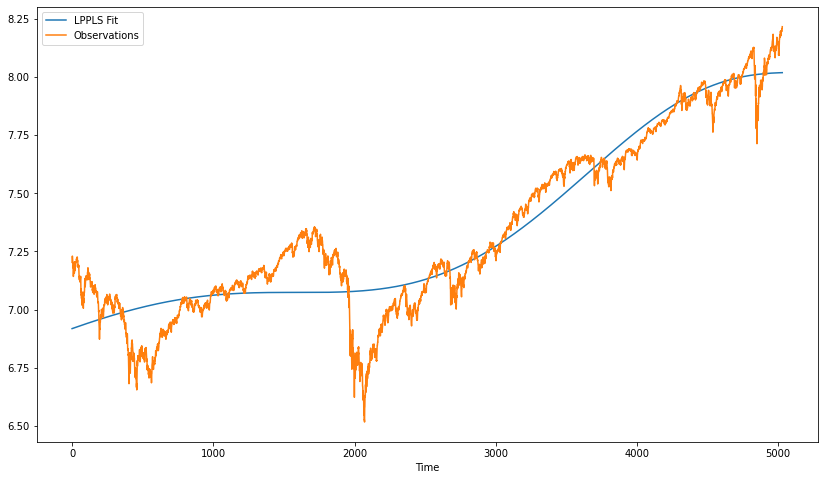

In [9]:
lppls_model.plot_fit()

In [10]:
filter_conditions_config = [
  {'condition_1':[
      (0.0, 0.1), # tc_range
      (-1,1), # m_range
      (4,25), # w_range
      2.5, # O_min
      0.5, # D_min
  ]},
]

In [11]:
res = lppls_model.mp_compute_indicator(
    workers=1, 
    window_size=120, 
    smallest_window_size=30, 
    increment=5, 
    max_searches=25,
    filter_conditions_config=filter_conditions_config
)

In [12]:
res

[[{'tc': 141.20906669989606,
   'm': 2.999278227877947,
   'w': 47.35964709434559,
   'a': 7.1052251922865866,
   'b': 4.4143869756822975e-08,
   'c': 5.49134588721551e-09,
   'c1': -3.73698629403165e-09,
   'c2': 4.023656681584337e-09,
   'qualified': {'condition_1': False},
   'sign': -1,
   't1': 0.0,
   't2': 119.0},
  {'tc': 126.04860531766886,
   'm': 2.7874789773712583,
   'w': 49.7950820392259,
   'a': 7.106195731598891,
   'b': 1.8289248625887528e-07,
   'c': 3.308516143967723e-08,
   'c1': -5.510697122507337e-09,
   'c2': 3.26229999343024e-08,
   'qualified': {'condition_1': False},
   'sign': -1,
   't1': 5.0,
   't2': 119.0},
  {'tc': 139.87357343784979,
   'm': 3.5068298722565086,
   'w': 46.288091065773706,
   'a': 7.105071514437994,
   'b': 4.6845211903613696e-09,
   'c': 5.01003093531081e-10,
   'c1': -6.644459484308717e-11,
   'c2': 4.965775020516447e-10,
   'qualified': {'condition_1': False},
   'sign': -1,
   't1': 10.0,
   't2': 119.0},
  {'tc': 138.8276148737077,


In [ ]:
lppls_model.plot_confidence_indicators(res, condition_name='condition_1', title='Short Term Indicator 120-30')

